# Model kentang tanpa transfer learning


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from keras.optimizers import Adam, RMSprop


2023-05-19 08:37:07.676890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Split train test 
import splitfolders 
splitfolders.ratio("Kentang", output="Kentang-data", seed=1337, ratio=(.8, .2), group_prefix=None) 

In [3]:
training_dir = os.path.join('/tf/disk/Kentang-data/', 'train')
testing_dir = os.path.join('/tf/disk/Kentang-data/', 'val')

In [4]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	testing_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 1874 images belonging to 3 classes.
Found 471 images belonging to 3 classes.


In [26]:
class_indices = train_generator.class_indices
print(class_indices)
class_names = list(class_indices.keys())
print(class_names)

{'Potato__early_blight': 0, 'Potato__healthy': 1, 'Potato__late_blight': 2}
['Potato__early_blight', 'Potato__healthy', 'Potato__late_blight']


In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [15]:
history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    callbacks=[myCallback()], 
                    validation_steps=3)

Epoch 1/50


2023-05-19 08:42:42.554388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 66s 4s/step - loss: 0.8465 - accuracy: 0.5795 - val_loss: 0.7679 - val_accuracy: 0.6508
Epoch 2/50
15/15 [==============================] - 67s 4s/step - loss: 0.7982 - accuracy: 0.6435 - val_loss: 0.7822 - val_accuracy: 0.6534
Epoch 3/50
15/15 [==============================] - 63s 4s/step - loss: 0.7651 - accuracy: 0.6259 - val_loss: 0.6936 - val_accuracy: 0.7275
Epoch 4/50
15/15 [==============================] - 67s 4s/step - loss: 0.7780 - accuracy: 0.6894 - val_loss: 0.7433 - val_accuracy: 0.6032
Epoch 5/50
15/15 [==============================] - 66s 4s/step - loss: 0.7027 - accuracy: 0.7161 - val_loss: 0.5356 - val_accuracy: 0.7804
Epoch 6/50
15/15 [==============================] - 20s 1s/step - loss: 0.7286 - accuracy: 0.6894 - val_loss: 0.7183 - val_accuracy: 0.5873
Epoch 7/50
15/15 [==============================] - 10s 641ms/step - loss: 0.6544 - accuracy: 0.7209 - val_loss: 0.5645 - val_accuracy: 0.7989
Epoch 8/50
15/15 [==========

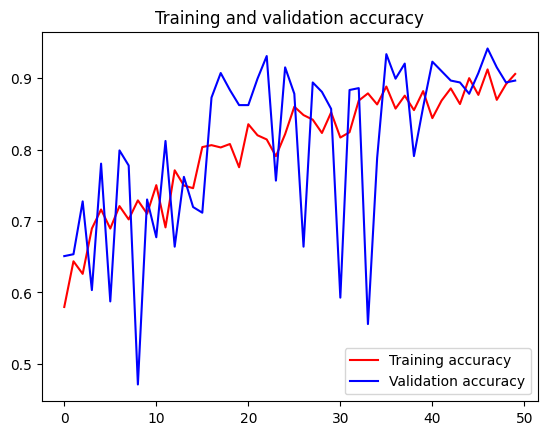

<Figure size 640x480 with 0 Axes>

In [16]:


import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


1/1 [==============================] - 0s 364ms/step
This image most likely belongs to Potato__early_blight with a 57.61 percent confidence.

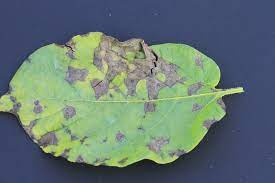

In [27]:
sunflower_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFRgVFRYYGBgaGBgcGhoaGhoYGhwaGhoZGhoaGRgcIS4lHiErIRgaJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHjosJSs0ND00NDQ0NDE0NDQxNDQ0NDQ0NDQ0NDE0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EADkQAAEDAgQEBAQFAwQDAQAAAAEAAhEDIQQSMUEFUWFxBiKBkTKhscFS0eHw8RNCYhWCksIzctIj/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAKBEAAwACAgEDAwQDAAAAAAAAAAECAxESITEEQWEiUaETFHGBIzLB/9oADAMBAAIRAxEAPwDySEk12mQyhJCAGmkhMBoSTQIEwkhADlEpJoAEBBTa0nTYE+g1QAIhJCAGhEpIAcolIKRFp/n2QA0ikpIAEIQkASmkhACKaEIAE0kiUANCEJgCEIQIEIQgChCEJFDQhCBAnKQCEANCSEDGhKUIEOU5UJTBRsCcpJOtY2UZQBOU1WHKWZAE5SCQKcoAEITlAAFJRQgCSFFSQAIUVJACATSKaAFCaipIAipKKkgAQhCYAhJCBFIQhCRQJpJoAEJSt2E4RWqQWMIB/ud5R6Tc+kqapSttiMSUr1FLwi7KS+oM0WDRaepOo9AuRiuBVWHzQBOpn7ArNeoxt6TGlvwc1skwLkr1/DvB7SA6rUMkfCyLHq8zPoPVcvhtBtF0VWFr5ygvDg0kzlh0ZQDaxIK9nwlr4IeQcsCB739/kuX1Wa0v8b18l8dLZxqPhFoMk5oO5Nx2H6r0tDDNYwNaPhH7KviFIELy8mfLfli2cbjjQWZCAc1rjNGmi8dV4ILlrz2ImPWZiei9niKjX1MurQARG5372hZq9Ft9vK7TmII0Xb6ariNmilNdngcThH0yQ4crgyL6dvVZw9ewfwsw4vaSCL2me4Gv8QpYbAYZl4aHHSz3dj5pjTZdk+pWuyeH2PL0MLUfdrHH97SrKuDqNEuY4DqCvcYN7NG3JnYz97a63XN4hinMxNJpgh1hNwKmrSedxEHoj9w99IOCPIygFdjH+HKrXxSaXtM3MNy8gSTy+6up+Eq5+J7B6uP/AFC1eeF5ZnS4vTOHKJXpaPhIf31Sf/VoHzJKud4TZs9475T9gofq8a9/wTyR5QIXpD4WGgqGerB12zLFivD1ZglsPH+M5v8AidfQlXPqcdeGCpHJQFE2JBEEbGx9QnK12MEwkmEwBCEIAklKSEACYTQmASUIQgRQhCCUiglSpU3PcGMBc46AKLWlxDWiSSABzJXqeFcLfQfJgl0BxiY39lndqV8ibL+DeH2sh9QB7+WrW9gdT1XeARTNrK2bLz6p09sxbbINJ0ROs/mnT+KFCpLZi6xqetjlmHitRrpa5sNILSbeYRMcwLnut3DJyNJILsouABNt4sT1AHYKnFMD2wRewF795U8HhHMbGaRyIHvbsldz+npdM35bWjoZ1i4pXDWTzLR7kD7q/VczjLgWBodcuFo6Ez8ljj7tL5FPkuwFMPdmc7SYi3IH6BQewl7r2JIBFjyIMiDcFZuHB+ZrSbGb76W+f0WhlNzXlrhNtdvf0+q7+OnrZ0LwaKtZzYa+DP8Af8OxN/bbmsVFjXuDpEXE7dPy9V0cTiQGwW3tqRc7Ll4djCfI8seTdsSwu6A6Wm46qHtS+hfwX4nD5PM1+l9IXCx+BfVIqNeQ5gBDSBre+YLr497XtLHAiTBIMGN4UKFMFoax5ju0mPULOOTW2R9TRszf1KQe05XFoO8S7UGOTifZZ+DcU/qF9Cp5a1OzhzEWe3nMq3A0cjMgE63JnffT5LjAOrYplUOE0WPa8AODwXhpYLjzAAkz39NnKpdlVPJdnpaV237H6IOvoqcK8t8puJN50O4lXmswmAbiZG+233XPUtdM5ahyQ0md1cxgn0VLoU6L4Kyc6IRm4nwanXb5mw/QPb8XMT+Id/kvFcU4PUoGXDMybPbp/u/Ce695ia5aQO3fXb97oZLgWkCLgzBBnWei7ceSscp72jV9SmfNAU16rjfhxsF9AQRcs2I18nI9NCvJgrux5ZtbQJ7JJhIFC1GNCEIAEwmmmAIUZQgRSouKcro8B4b/AF6tx5GQXdeTfX6BZ3aiXTGdbwxwrL/+zxcjy/4tO/c/RenY2bxZSZTtCtLZ0XlVldPkzN9sqnVDPtdWZAplkwkmhaZnaYIPI/T9EnVATcEHb9Vc9kqosgXurT60LwYcdiHNczKRvOnSPutNHiYcMpbJ3j9VjxUO+ED4pJtoBCVFrRrbTf2WrwQ5W0dUro6IxgMQDHMx9NVqfhGvbDgCDBv8jK5mAoZnnb5wOvNdqpUY0AkwOs/dceeJhpR5Bycingix4NyJJBOhjT72V/GXedkWhpzdpET2grpNex7bEELzuNqkvPmtMkH8Og+/qVpjqrab9ikyymQ9ol5OkzuBe238qnEMLWuLT9bcjO2quw2DDxmNmz5Y+snb8gtuOLQwMMSG26x26kJ1nXLjPY+SKn4phpAPFyIjWT0jtquaxkEWAvMg7bZu3MrQw0tTBdzOvqd1Swy7Zw6a+22q2mUuihVcaaTX1TLmMa5zgIJgAm06myuwWDaHvrklr3sa0tBBYA0mCDAv5om2gssNfAugssGHMMhJmHCDJNhqbdV1MBh2tLc34Q0Da0/P8gqb4zslsrwxElrhuTO0zNj+9VVXpNBcfLAmY6gXt9fyXWxWHAbmAgztuD00mywsbGovrMz+/wBERaqdoSe0SoZhc3G3Meu60U9ZVYeGAT2A32+V02Om4HpuuW5e29HLctMdRgcbj6+uilQZlJB7jtH6IaLz2U6rvpfso5PTT8E8nrQ3vkrxvi7AtZUa9ghtQEkf5tjMfXMD3leuYZ9V53xy8BlFu+Z59IYPutPS25ypL3KjyeVapKtpVgXsI0AIQUwmAKSEIAEIQmBmeV7jwmWCg2Bc3dzzO/cei8fhOHVK3wNdl3dBIHsLle18OYF1Nvmlp0gwbDS/quL1VS502PXR3bRKi0KwEWUAZXlzW1oipBj9lY4CFUGwf3ZTcr33r2EIhRey0IebT2TB3TnaYmc3HYKfM2x36jqtPDqLQNjt/K0ASouZlJM/vmtXVUuOwVtGinRY0y1oBXF4q6H3mDcAAkkixAAvyXbDoCycQAc08xcdxf8AP3WePc332bTfaOHh3PzS8G12tBlo280am/YbXEq9+HFZ+V+gk97AD7FQc/kDrGnvZa8MG0wXVQIkC4nXc+668mlLS8mtNFtHFCcusWECx5AJcQwzsofqRqOkj8lPE4XMczDA5Cw72Vor5Q4PiQDroeq45hK1Uf2ZbSfRw3YcBweQZj9/Ur0WEwwpsA3PxHme/IaBcBzXZw0WtcGxPIXuu6Kua+x25Lb1O3KSHVaMHFHjPDr6RvFgJUP6hayAM8m4O0CTyupcTPmbtIPWYLdfdV03izQdTtqOfyHyW2NpQn8FKvp2KrUe6GiXAH4f1P0MIptc5xy2/ETt0jcrcxgAgCEOZOmqyWZa6Ri8r9kU/wCnQBldHQ3B+6ue8NHwx0GnzWhjoAXM4rVOZsb2tfcWWS3kpKn0JN09MWIxRAJEAj1tP72U6dQuaMwOltL87+m4RSwLyfMwwBYQYnqtgwzhrlH+5v2kp5nEzxQ61rSQNrsY1z3HI1oLnE3gASTZfO/EPFxiaxe2cjRkYD+EauI5kkntA2XvqmFEyHtaSIMS6RBtFgdU3cAoOblcxsnXJTptP0MLPBUY65N7/wCDlJI+YtctFCk59mtc49ATy5d17tmK4bQjzUi4HUDO6ZA1Y2OXsoO8bYVp8lN7v8gxjB7kl3yXf+6p/wCsN/grR4h9NzTDmlp5EEGD0Kiur4i4y3FVA8MLCG5ZLs0tBJFoEXJ91yV2RTcptaZI1JRQqAcpoQmI+n4VrGsaxlmtAAj79VxuKUHtqZ2SQ6xM3FomBqF0f9QokWewiY8rgb9YK5fGOJMcMjSSWkEkWB6A76heHi5c+l0/OzTT2dXC1WvsHS4ASAtOSy4nh6gBL5O8DUea5XedUgdFNTMXpdktIxVcc1rwyC4kgdpE+v8AK0wf0XGx9aXkholtgYuABf5rpYZ7ntac1xM215fytssahUuvuNytbLXNnl8/zRffQLQ1qrr1A0TqeQ+6wi+XRnxKmOJFxF9r/km/sT7LnnFOBMWHuJ3ABH8rXgsVnmQJBg/nddFY6lbG40tk8+0GI6FQeGumdDa4O/aVpcQVne3bUrPZDK8NQbTBgtJOpId6AeXSydWHAh+Ug7eY/wDXom+2imGWQ229vyU6bFSc0NABHs//AOUPLHkea8jZ3sfKomyiOm6Eu9k8ib2tm5nbc/OFW8i4a+Dt5SQFaxkqLmwhS9+Q5fBlr1WOLfP5hmB8pMg2O8RMb7KGHwzA8va97tbQ0ek3XMczzT0jtuZ/ey28NYAXG9zb1E2HqVvcOZ1LNq6no6QeI+E+rvyAspUngn4R6lx+8KE2QbW3Kw4LXZzcmWPxAJgNb/xB+ZCX9d+xjtA+iTUOIRwlPSQ+TZF7zN3HtPzVWaL9/ZY3SXZhO5GwudyfstlMEXJv9P1hGWZxrlv+i6nXuTYIMm7thqB3/JcTjdWpWY+mHGT/AGg6hrg4T3jsu7l5KjEUM7czQM45/MTsow2nSdL+PgMdJPTPmTGe+nVWNar8f/5X2jzGR1NyqmhevKNmWNTCSa1RI0JJpiBCEIEc12GClTr1GRDiR+Fxkek6ei0QouasnjRoqPfeEOI/1qZB1aQBzykWnsQR6L0gp85Xy7wxj/6FcAglr5EDefvIEevNfQMTj2lkMDgTFyIgam/yXlZsFLJ14Y9bJ4mnSzectmLA6n03WqnUa1ogfb6rlcMwjiS9widJ1ImxK6jGSVnk0vp3vRD3skXE9J5Ie0AEcwm8gdysWNxWUF2sajp0WMv6kpF/Jy2MfmdA80X+UXmOa6eEoimLmZieW8R7lKjXDvhFyNxH8qxrL3vaO3Zdd5m1xE7b6LS8EW+aiAU0OeoT2QImylqFW4yosdB+yuUn5JbYnAg9EMYpOl1ypMCK+ARY0WVFRxAsJ+5VocqKuIbIH7/cqU3voZXQpeW4gm5AOhNz9VJtNTJCWn5fmqX3Ym9km9fT9UsqRJ1Knsn4EJyrfCm4qqJ3U0wE0Sf3qrCPRDQsPEWu+ITlG+09brmhPNk1vouZ5PRvLgALiCQPfRRx2Op4dhqVD0aB8TnfhA++y8TxvjJYcjIzAXdYxN4A59Vwqld7zL3OcRpJmByHIL0J9LPXZp+mkacXinVaj6joBeZgaDYAegSaqmBWtXdC0tIomEwkE1qSCaSYQAIRKEAUIKFJAyqoyV6bgvE87Cx584jNOjmg6gacvdeeUZIMtMH8xBB6ELK45Iqa0fXcNXY9gc0jT6LDj+IsZ8Jl2wF/fkF5vhnFQygCx4c4RmpuPmbfUR8QVL8cBuJdflc6mNl5f7X639iuKZ2H8Se5wmGXGl9ep78l0KeFaBJlx5leba4ubPMiPmfsvScPe4sBdy9+qM2KMcqpWiblGJ1Kox4eD5ZGbtvroBf3XRbiGk2SxbC5jmgagj3CyYPhpYJzdwN+8rNZYud09Mz10bXvjRUmp+ysWGourOJeC1rDAAdbNvcXXUFADRX4Wl5JpaING6mxuqTnwLC8WHPoo4QugueIJOkzGybT47J0LFVcg67WlFHENcbHuNwqsfSLoI29us/L2VWHw4aBAg/zr36LVTLjfuU+Kn5N5hYamFYSXQM3PQ+/oryT6c1ABZKuPgjbJsdAF/VTF1XUy5cs8lS5pbYHNMXJiNtVcy67KmHRqc3ZDNFjDnXiDvJMAHkr6AJaCdTc+qMkuVsKjiScVVKuKrhc1Pa0Qy1oWbjOLZQove+8jK1v43EWb23J5LTnaxrnvOVrQS5x2AXzjxBxg4mqHQQxtmN3Am5P+Rt8uSn0uJ1XwvJrE77OXcmTckyT31VrGqDQrmBe1KNSbQrO1vmoBTC0QiQTSCYViBCEIAaEIQIoTlNCBgEimhAEHOIuLEaFev8AD2FoYoZx5HM+OmHFxmbOzG+UwPmvIOWfM9jszHOY78TSWn3F1y58bufpemVL0fV34WkDlyt57T1WimxrGgNsPdfJ8DxZ7HtdVzVWtOjnXjo4zbou5i/HGc5WUyxnOQXfL815uT0uR0p317sej1lPi7XvyMaSZOthA3ldEzA6rgeGsaKoJYAWtsXaGTsRsutjMTkbIF9h1UvClfGUZ0tvSL30GkQRb780wA2yz4HFh7J30PQ8la953utdOXpmbTXRIuVZcqxiWm4M/r/CrZimOMNIJmIGqb630Liy3MYvZRbCtFM6rNWxDGWJvyFzdY1lbWl+BKWyx4Edlaxgj9hKmJ2TdYFziABq4kBo7k2WXJ09IaRjxWEMhzZJm4nbskx/lOocBHef4WvA8Qw7zDK1N7uTXtJ9plXYnDAmYv8AvVdEeocNTRvNNLTRRRDYB7bR8kOrN2KjhqbgXNN7+nQqh3CXOfLnnIJOvLY9N/RVyltumQlyfZU7HsDjmJEdNZ5fktb6zGML3ua1g1cTbsOZ6C68N4g4xle5lF7XgavAkTybsY56LhVa73xne50aAkkCeQ2Wr9PNLpj/AE5O34k8QuxJyMllEEQDYvI/uf8AYffTiNahrVY0Lpx45ieMlja1WtUQFILZIRIKYUQmFaAkmEk1QhyhJMCf5QA5CEkIEVIQhAxBNCEAQKg8KwqJCloaMz2Kh7FtLVU5qzcjIYPF1aLs1J7mHfKbHuND6rXW8RYl8Z3h0CLtaJ7wBdZHMUDTWThb3rsezq4fxViGGSWuB1ERz+fW67NLxkypDajXUxu5pzW9BPyXjzTUcimsab2J6fk9hjPE2GYAyiHvEXcQWj2kE+q6XDPFuGLQHuyED8Do+QK+e5EsqzrBNTp7BpM+rf6/hKoyMxLWk6Eyz5uACwjGYbDkvfXa46gNdncewG/dfOMieRZr0iS0m9Bo9dxHx082w9MM/wA3w53o0WHzXlMfj61czVqPfyzGw7NFh6BQyoyraMMz4QJJGcsXpOC+LcThxkJFVmzXySP/AFfMgdDIXE/ppimrrHNLTQ9nr6nj95Hlw7Gu5l7nD2AH1XF4p4ixOIGV74YdWMGRp7xcjoSVzAxWBimcEJ7SEVsYrGtUgxTa1bqQEArGhMNThUkIeUxPNMJAKQV6EMBMICEwJIQgJgBQhNAiUjafVCghAFQKaEJDEUwhCYhFIhCEhkSFEhCFLGQLVAtQhQxiLUi1CEMAy2SyoQpAMqcIQgAyoypoQABqYahCYEg1SDUIVICYCYCEJoRIBOE0KhAEwhCYDTQhADAvZCEJgOUkIQIEIQgZ/9k="
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)